In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

In [2]:
# 153 884    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884 - 153) / 2134


def nm_to_x(nm):
    return round((nm - start) / step)


# номера точек в массиве по координате х
start_point = round((start - 153) / step)
end_point = start_point + int((end - start) / step)
lamp_point = nm_to_x(565)
mean_point = nm_to_x(650)
min_point = nm_to_x(420)

x = np.arange(start + step, end, step)

In [3]:
def get_rmr(spec):
    y = []
    spec = re.split(",", spec)
    y = list(map(float, spec[start_point + 11 : end_point + 11]))
    return y


def get_txt(spec):
    y = []
    spec = re.split("\n|\t", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 15].replace(",", "."))
    return y


def get_csv(spec):
    y = []
    spec = re.split("\n|,", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 1].replace(",", "."))
    return y

In [4]:
def get_data(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
        spec = re.split(",", spec)
        _data.append(np.array(spec[start_point + 11 : end_point + 11], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

In [5]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data = []

main_folder = r"C:\Users\Nik\Desktop\prog\только rmr"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)

for i in range(len(folders_list)):
    data.append(get_data(main_folder + "/" + folders_list[i] + "/"))
    print("data from " + str(folders_list[i]) + " recived")

C:/Users/Nik/Desktop/prog/только rmr
['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
data from 15 recived
data from 16 recived
data from 17 recived
data from 18 recived
data from 19 recived
data from 20 recived
data from 25 recived
data from 26 recived
data from 27 recived
data from 28 recived
data from 29 recived
data from 30 recived
data from 31 recived


In [6]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[mean_point]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i]) - mas[i][mean_point])
    return _max

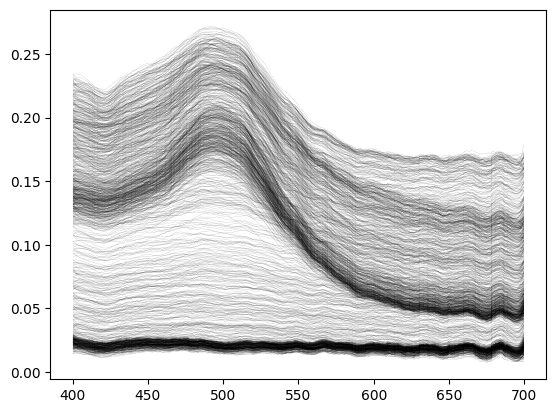

In [7]:
# просто посмотреть график в какойто папке
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12

n = 2
for i in range(len(data[n])):
    plt.plot(x, signal.savgol_filter(data[n][i], 60, 3), lw=0.05, color="black")

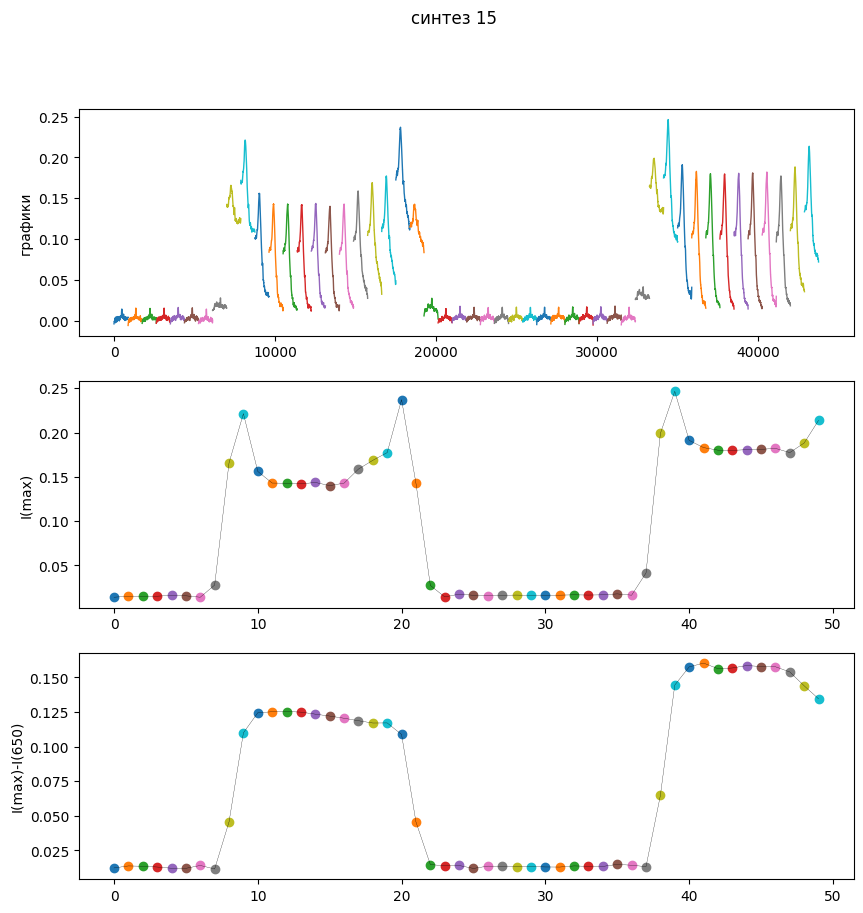

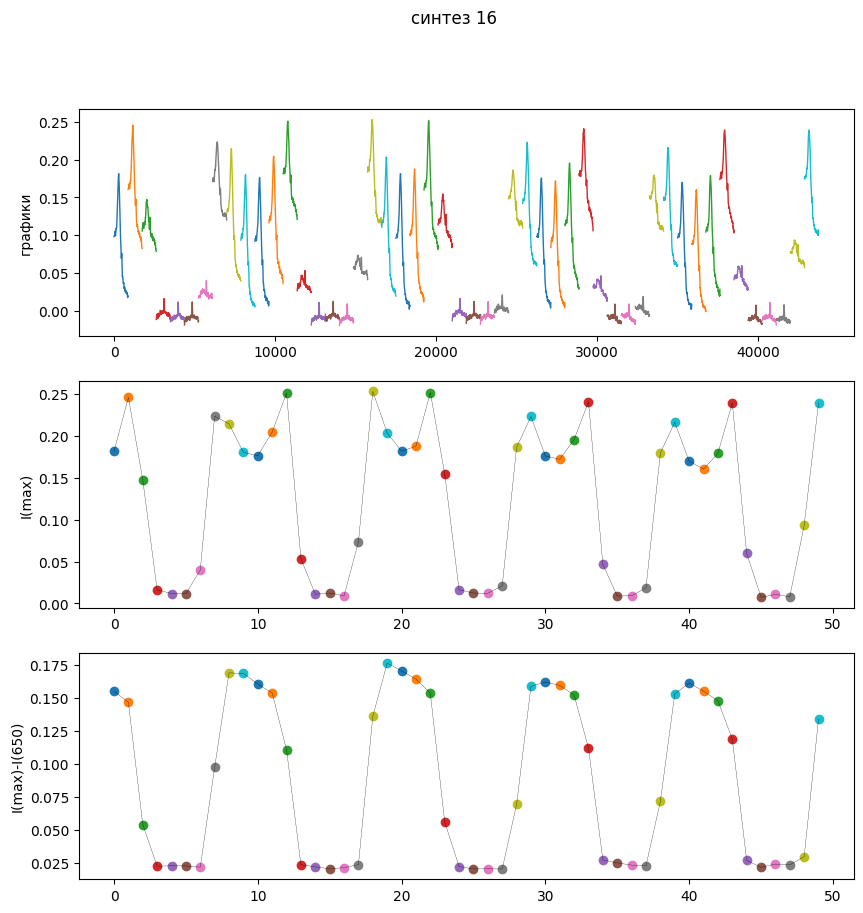

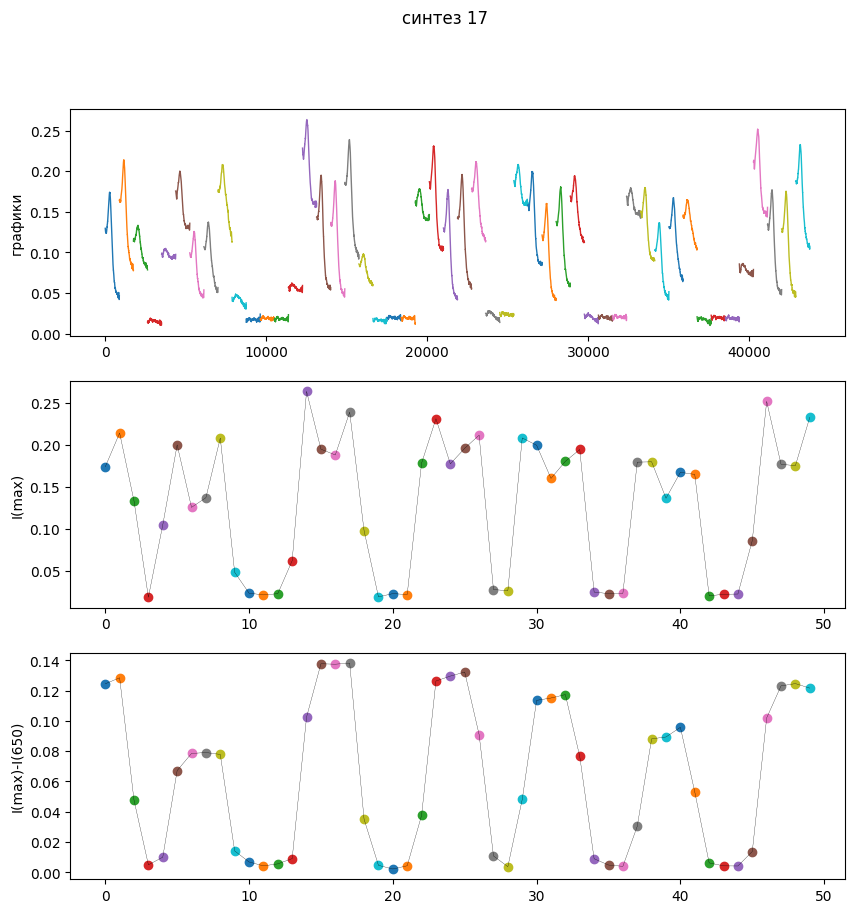

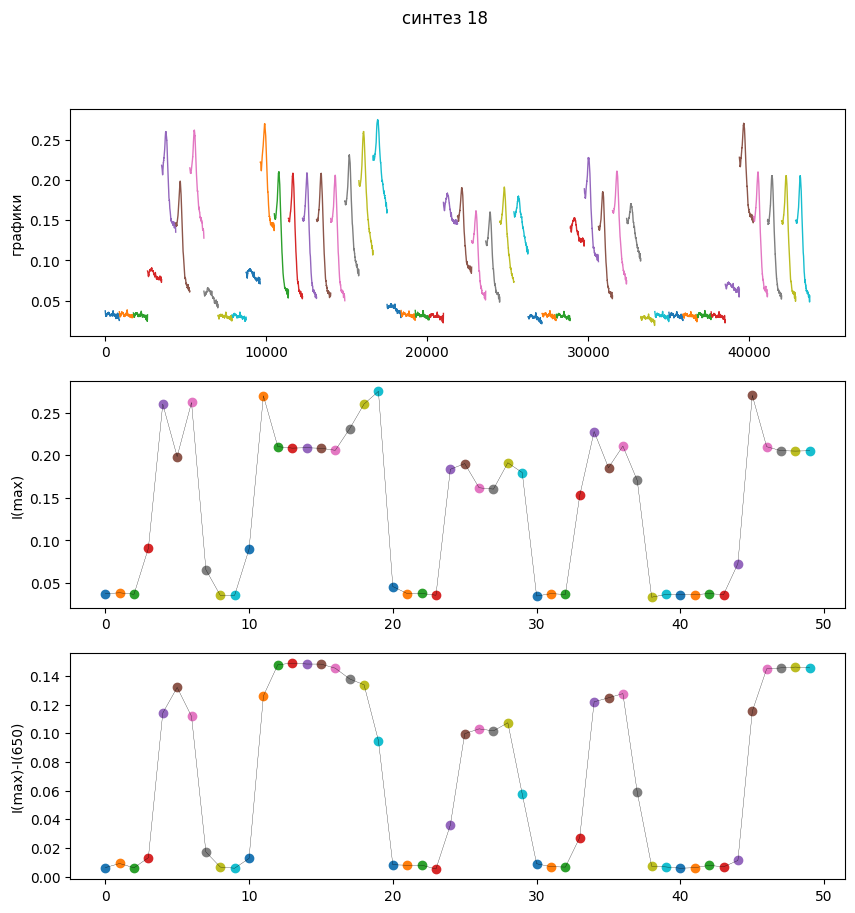

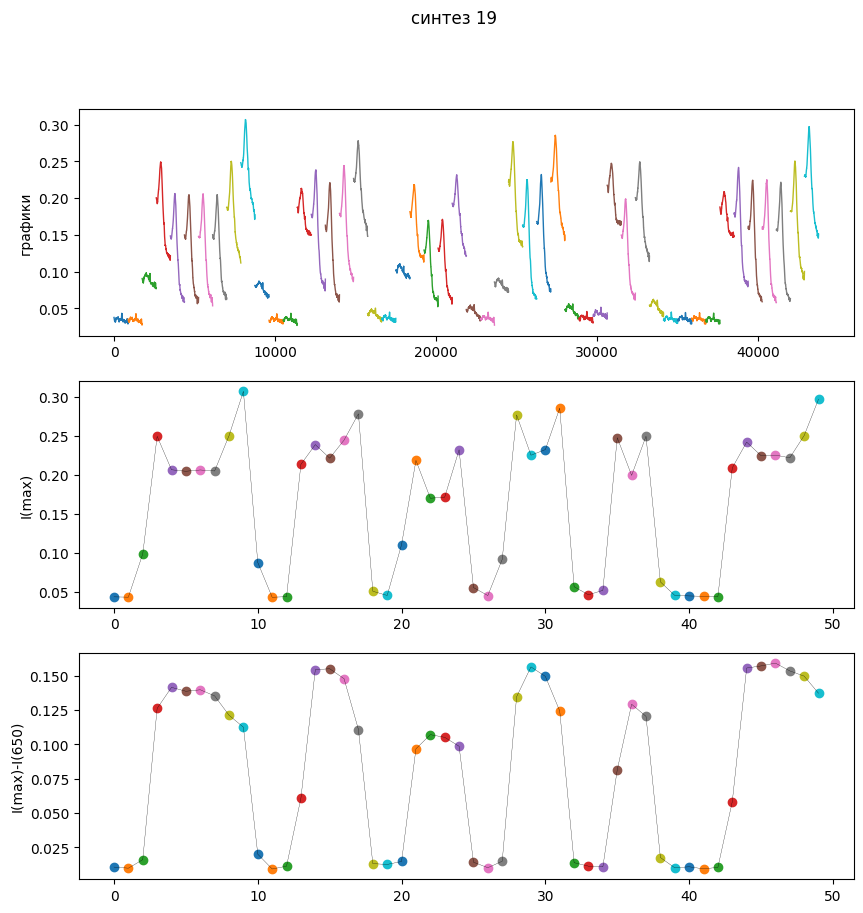

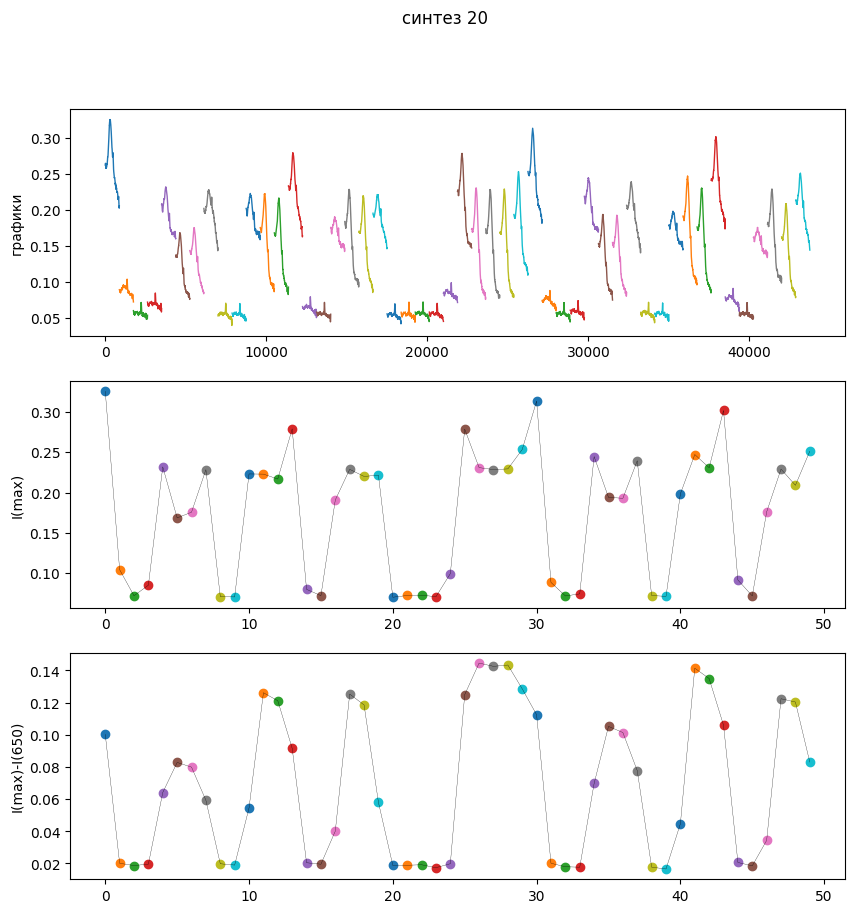

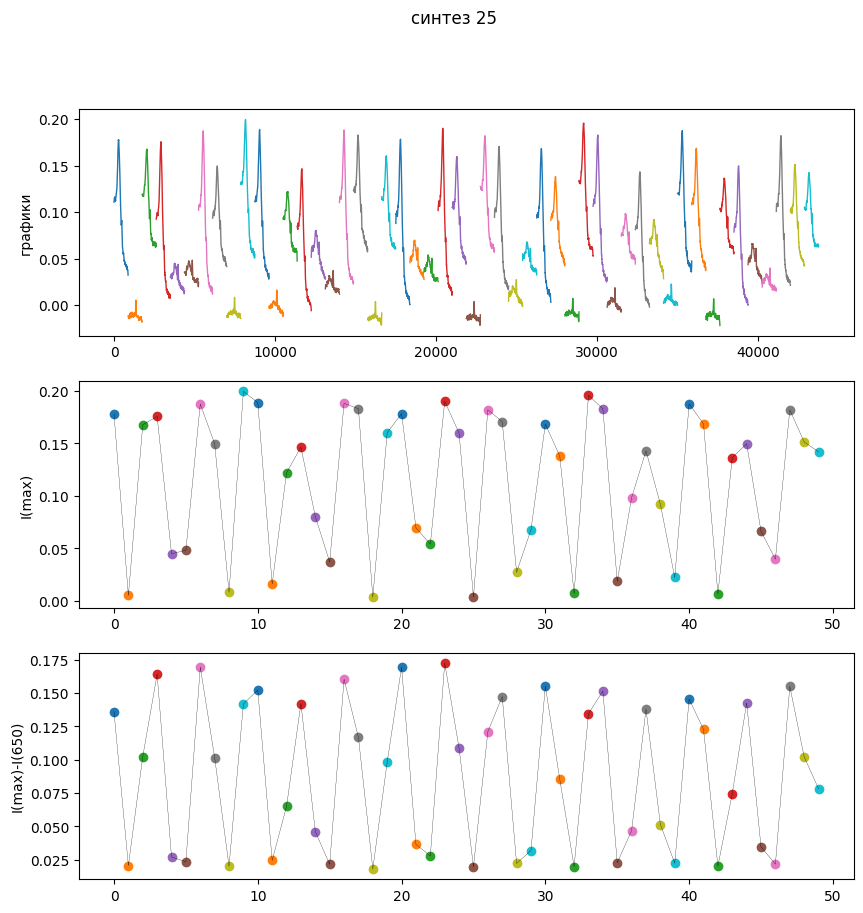

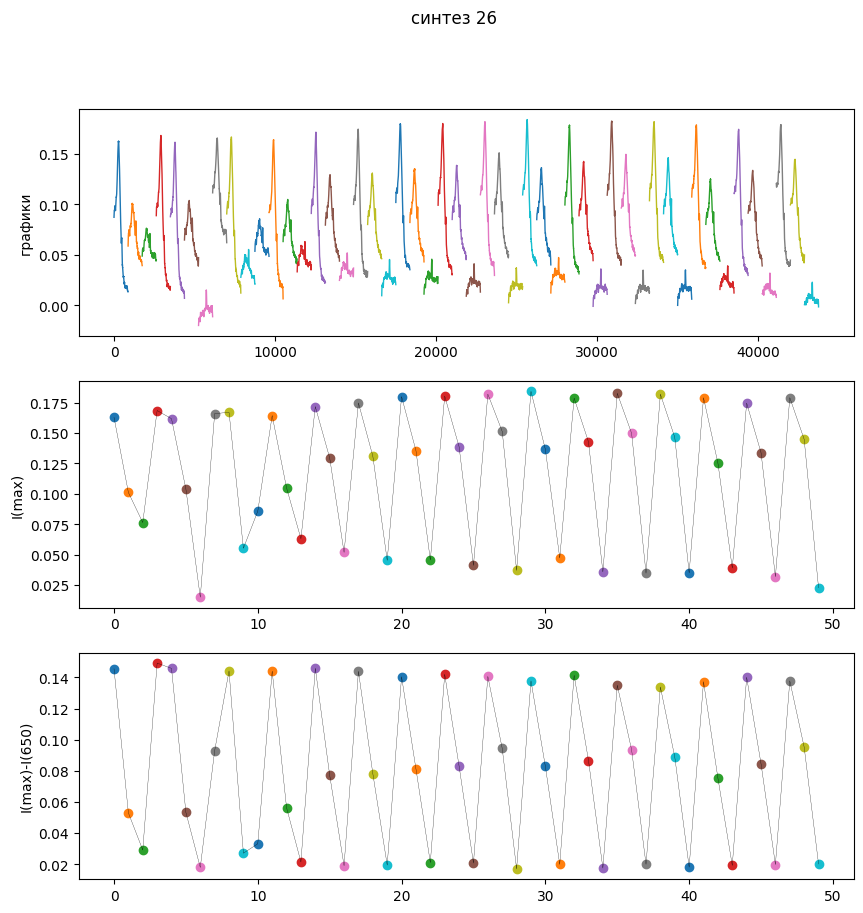

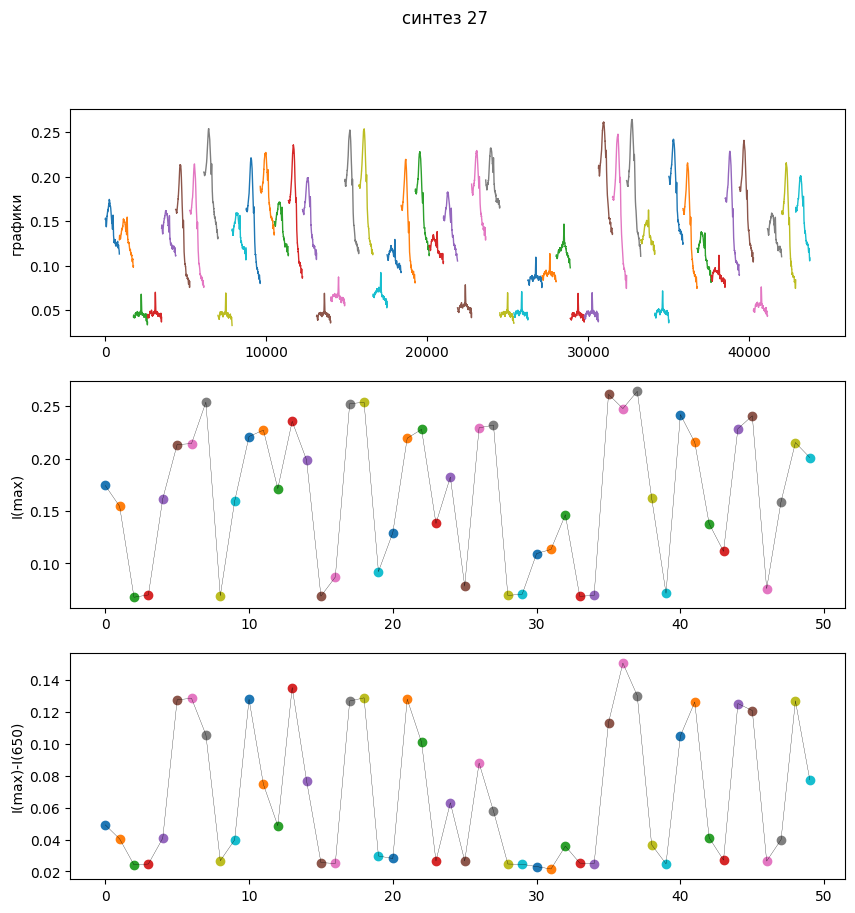

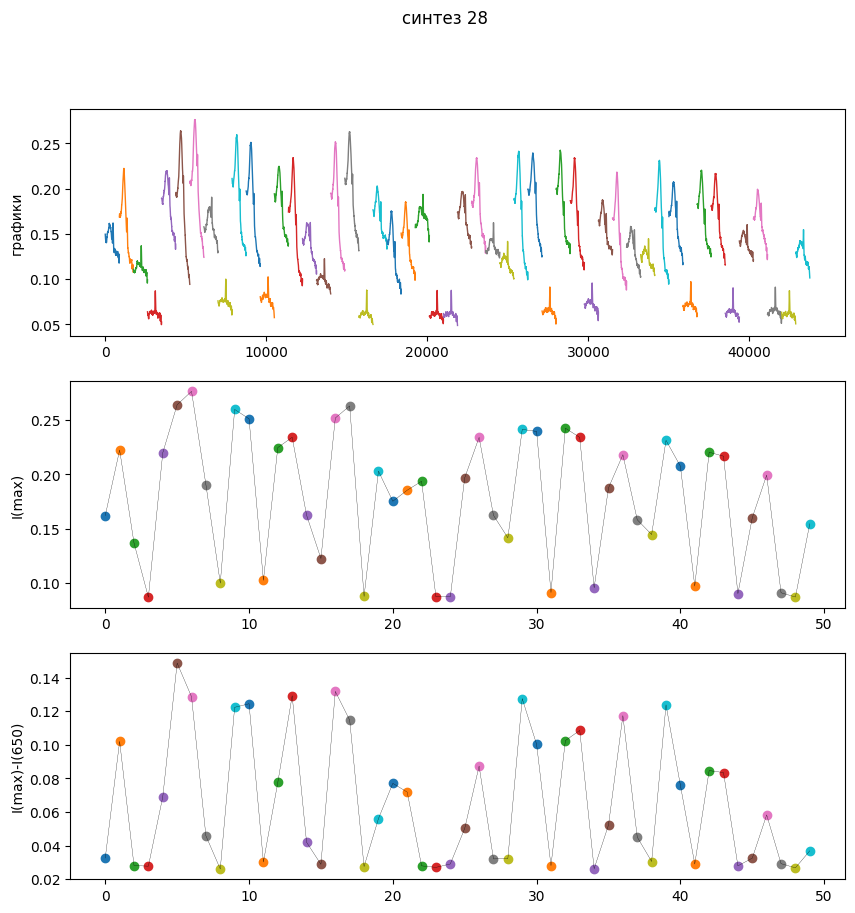

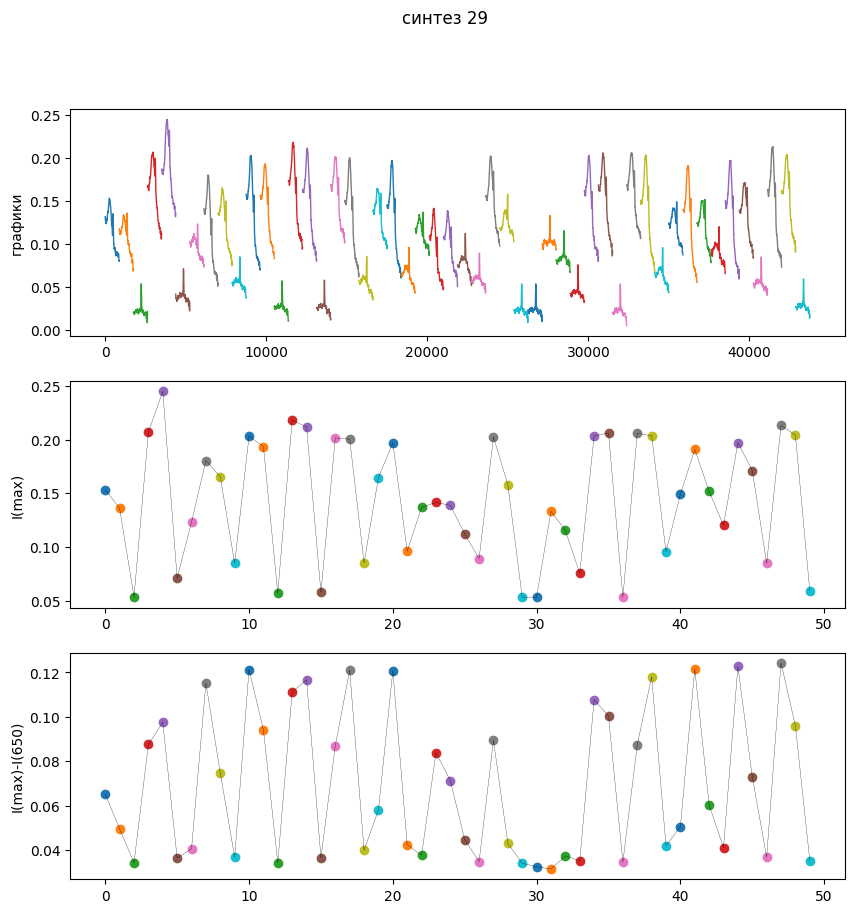

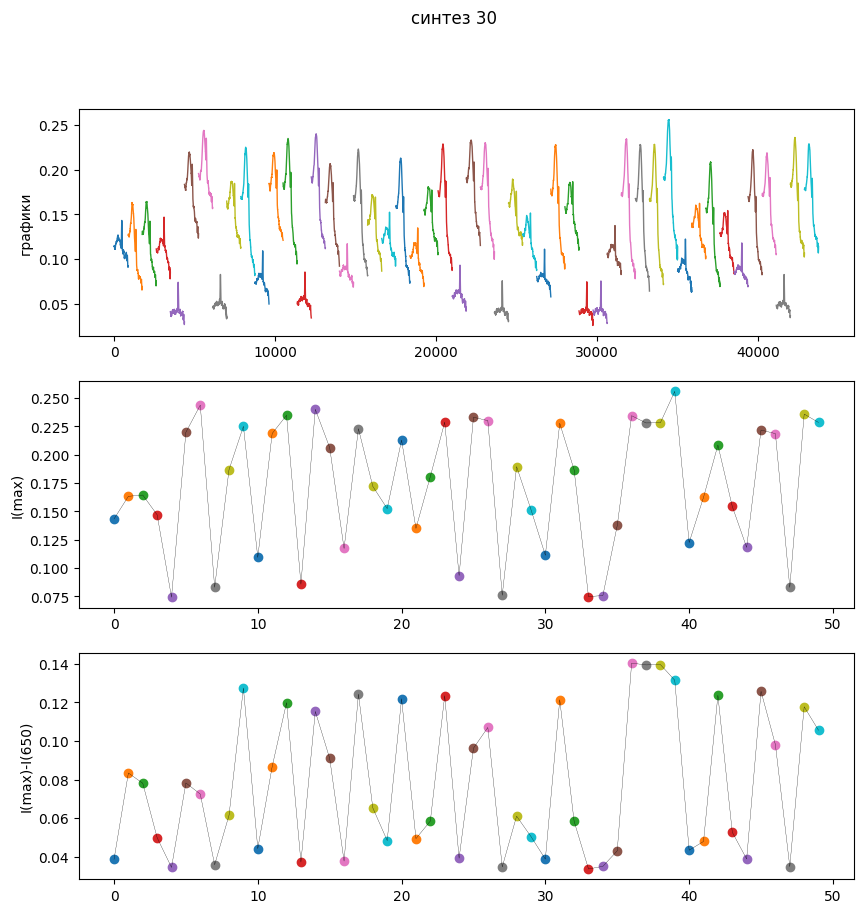

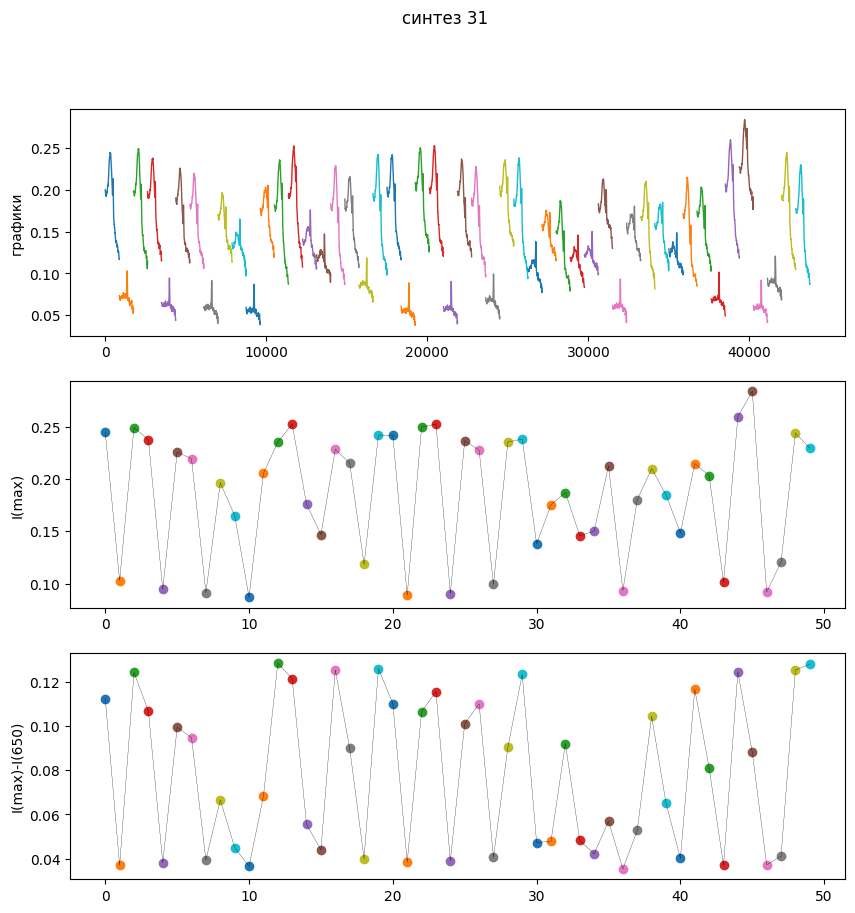

In [43]:
# график на таймлайне
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12

for _folder in range(0, 13):
    _mas = data[_folder][50:100]  # 100 cпектров из папки
    for i in range(len(_mas)):
        _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(10, 10))

    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle("синтез " + str(folders_list[_folder]))
    axs[0].set_ylabel("графики")
    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(x)

    axs[1].set_ylabel("I(max)")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i])
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")

    axs[2].set_ylabel("I(max)-I(650)")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i])
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    plt.savefig("timelane/" + str(folders_list[_folder]) + ".png")